<a href="https://colab.research.google.com/github/MirzaDanyalBaig/ML_OEL_PhonEzy/blob/master/ML_OEL_PhonEzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contributors:


1.   Muhammad Faizan Khan (CS-21070)
2.   Mirza Danyal Baig (CS-21076)
3.   Aneeq Akhtar (CS-21101)



# Importing Packages

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
# Importing dataset
df = pd.read_csv('smartphonesDataset.csv')

                                     Smartphone     Brand           Model  \
0            Realme C55 8/256GB Sunshower Libre    Realme             C55   
1      Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung      Galaxy M23   
2  Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola        Moto G13   
3      Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi  Redmi Note 11S   
4       Nothing Phone (2) 12/512GB Blanco Libre   Nothing       Phone (2)   

    RAM  Storage   Color Free   Price  
0   8.0    256.0  Yellow  Yes  231.60  
1   4.0    128.0    Blue  Yes  279.00  
2   4.0    128.0    Blue  Yes  179.01  
3   6.0    128.0    Gray  Yes  279.99  
4  12.0    512.0   White  Yes  799.00  


In [ ]:
# Show initial 5 rows of the dataset
print(df.head())

Data Preprocessing

In [238]:
# Show information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Smartphone  1816 non-null   object 
 1   Brand       1816 non-null   object 
 2   Model       1816 non-null   object 
 3   RAM         1333 non-null   float64
 4   Storage     1791 non-null   float64
 5   Color       1816 non-null   object 
 6   Free        1816 non-null   object 
 7   Price       1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB
None


In [239]:
# Show summary of the dataset
print(df.describe())

              RAM      Storage        Price
count  1333.00000  1791.000000  1816.000000
mean      5.96099   162.652150   492.175573
std       2.66807   139.411605   398.606183
min       1.00000     2.000000    60.460000
25%       4.00000    64.000000   200.990000
50%       6.00000   128.000000   349.990000
75%       8.00000   256.000000   652.717500
max      12.00000  1000.000000  2271.280000


In [240]:
# Checking for missing values in dataset
print(df.isnull().sum())
# Missing values are present in the dataset in RAM and Storage columns

Smartphone      0
Brand           0
Model           0
RAM           483
Storage        25
Color           0
Free            0
Price           0
dtype: int64


In [241]:
# Checking for duplicate values
print(df.duplicated().sum())
# No duplicates are found in dataset

0


In [242]:
# Show count of each brand in the dataset
print(df['Brand'].value_counts())

Brand
Samsung       458
Xiaomi        351
Apple         292
Realme        117
OPPO           92
POCO           67
Motorola       57
Huawei         57
TCL            36
Cubot          34
Ulefone        30
Blackview      27
Vivo           27
Honor          27
OnePlus        22
Hammer         21
ZTE            17
Nokia          13
SPC            11
Google          9
Nothing         9
Alcatel         7
Crosscall       7
CAT             6
Gigaset         3
Qubo            3
Asus            3
Doro            3
Sony            2
Swissvoice      1
Maxcom          1
LG              1
BQ              1
Funker          1
Fairphone       1
Microsoft       1
Lenovo          1
Name: count, dtype: int64
RAM
8.0     381
4.0     380
6.0     259
3.0     112
12.0    109
2.0      88
1.0       4
Name: count, dtype: int64
Storage
128.0     732
256.0     412
64.0      332
32.0      166
512.0      94
16.0       24
1000.0     17
4.0         6
8.0         3
2.0         2
3.0         2
12.0        1
Name: count,

In [ ]:
# Show count of each RAM in the dataset
print(df['RAM'].value_counts())

In [ ]:
# Show count of each Storage in the dataset
print(df['Storage'].value_counts())

# Data Cleaning

In [243]:
# Filling RAM and Storage feature columns with mode of there respective columns
df.fillna({'RAM': df['RAM'].mode()[0]} , inplace = True)
df.fillna({'Storage': df['Storage'].mode()[0]} , inplace = True)

In [244]:
# Checking for missing values again
print(df.isnull().sum())

Smartphone    0
Brand         0
Model         0
RAM           0
Storage       0
Color         0
Free          0
Price         0
dtype: int64


# Exploratory Data Analysis (EDA)

In [245]:
# Visualizing 'Brand' feature's frequency distribution
# Count the occurrences of each Brand category
count = df["Brand"].value_counts()
print(count)

Brand
Samsung       458
Xiaomi        351
Apple         292
Realme        117
OPPO           92
POCO           67
Motorola       57
Huawei         57
TCL            36
Cubot          34
Ulefone        30
Blackview      27
Vivo           27
Honor          27
OnePlus        22
Hammer         21
ZTE            17
Nokia          13
SPC            11
Google          9
Nothing         9
Alcatel         7
Crosscall       7
CAT             6
Gigaset         3
Qubo            3
Asus            3
Doro            3
Sony            2
Swissvoice      1
Maxcom          1
LG              1
BQ              1
Funker          1
Fairphone       1
Microsoft       1
Lenovo          1
Name: count, dtype: int64


In [246]:
# Calculate percentages of 'Brand' feature values
percentage = (count/ count.sum()) * 100

<ipython-input-247-5457a99a5566>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=percentage.index, y=percentage, palette="deep")


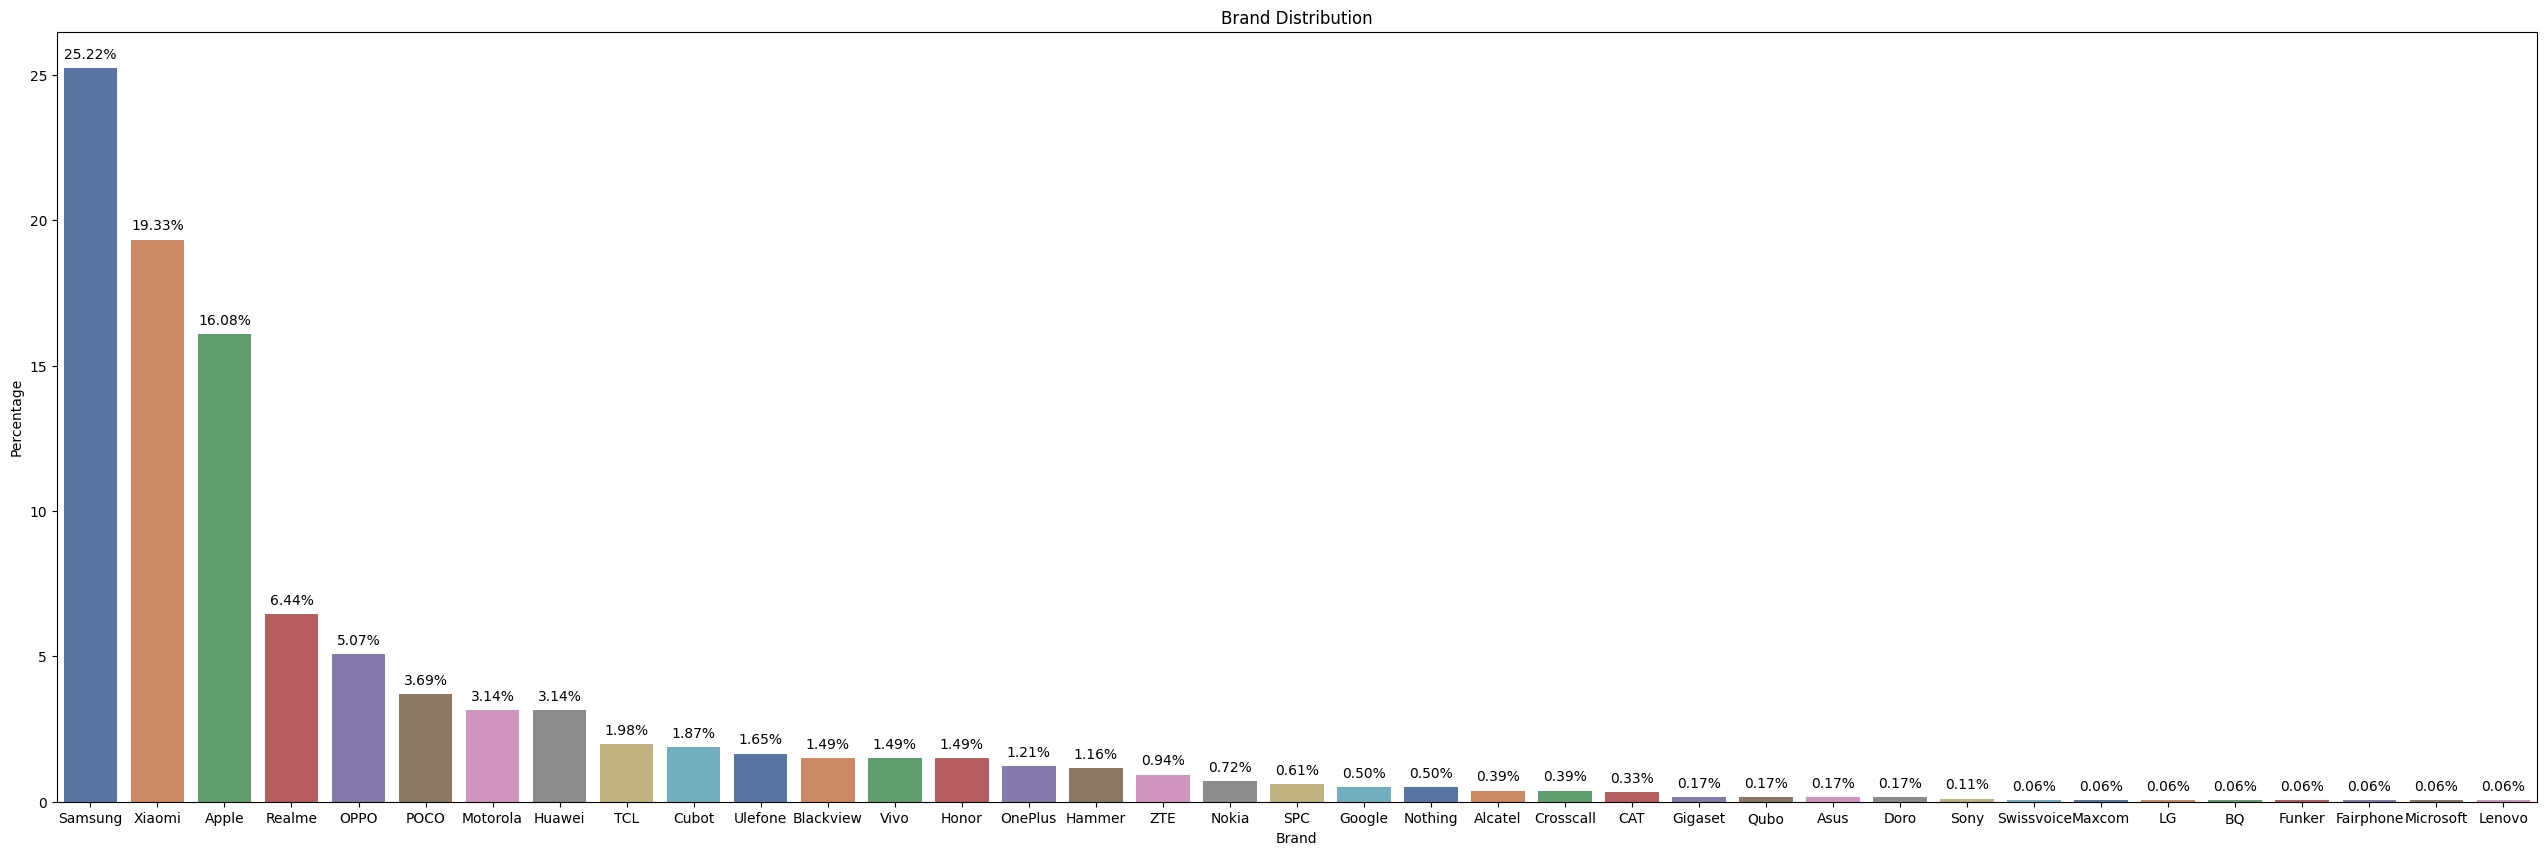

In [247]:
# Create the vertical bar plot of 'Brand' values distribution
plt.figure(figsize=(32, 10))
barplot = sns.barplot(x=percentage.index, y=percentage, palette="deep")
# Annotate each bar with the percentage value
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')
# Set the labels and title
plt.title("Brand Distribution")
plt.xlabel("Brand")
plt.ylabel("Percentage")
plt.show()

In [248]:
# Visualizing 'RAM' feature's frequency distribution
# Count the occurrences of each RAM category
count = df["RAM"].value_counts()
print(count)

RAM
8.0     864
4.0     380
6.0     259
3.0     112
12.0    109
2.0      88
1.0       4
Name: count, dtype: int64


In [249]:
# Calculate percentages of 'RAM' feature values
percentage = (count / count.sum()) * 100

<ipython-input-250-da2662ab517e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x=percentage.index, y=percentage, palette='muted')


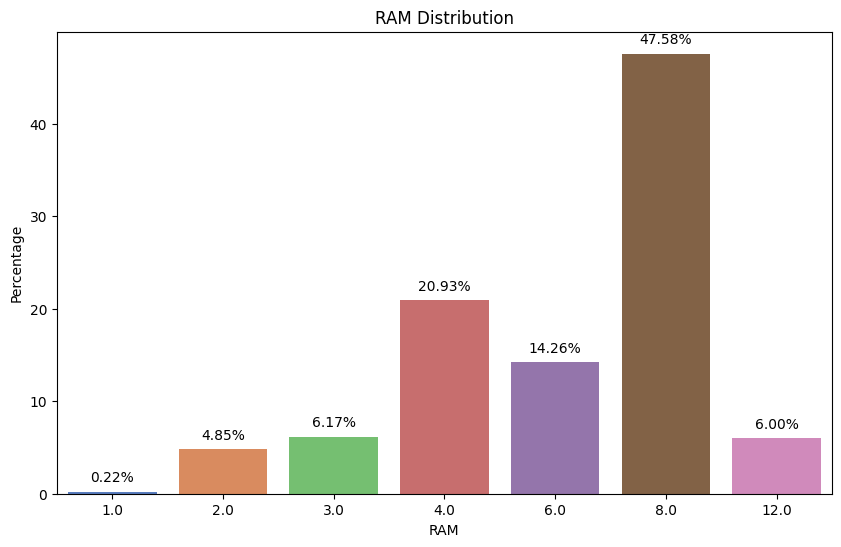

In [250]:
# Create the vertical bar plot of 'RAM' values distribution
plt.figure(figsize=(10, 6))
barplot=sns.barplot(x=percentage.index, y=percentage, palette='deep')
# Annotate each bar with the percentage value
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')
# Set the labels and title
plt.title("RAM Distribution")
plt.xlabel("RAM")
plt.ylabel("Percentage")
plt.show()

In [251]:
# Visualizing 'Storage' feature's frequency distribution
# Count the occurrences of each Storage category
count=df["Storage"].value_counts()
print(count)

Storage
128.0     757
256.0     412
64.0      332
32.0      166
512.0      94
16.0       24
1000.0     17
4.0         6
8.0         3
2.0         2
3.0         2
12.0        1
Name: count, dtype: int64


In [252]:
# Calculate percentages of 'Storage' feature values
percentage = (count / count.sum()) * 100

<ipython-input-253-347f528266c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x=percentage.index, y=percentage, palette='muted')


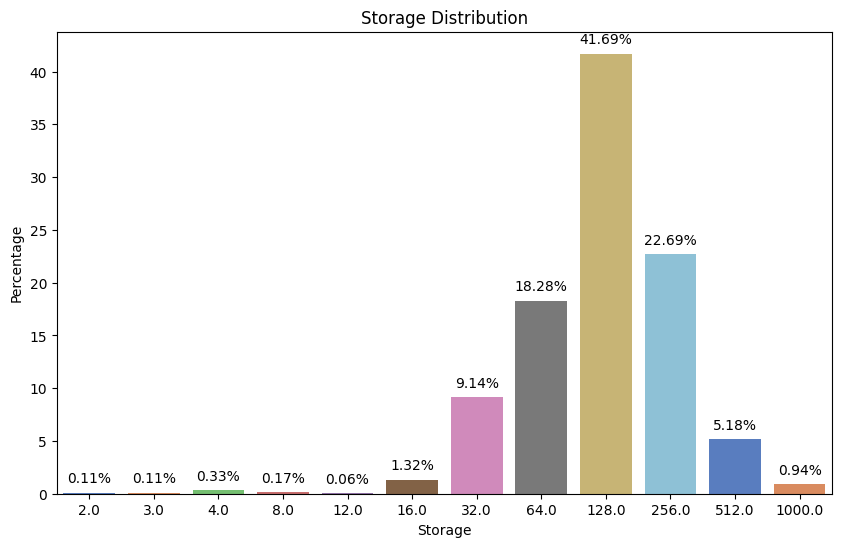

In [253]:
# Create the vertical bar plot of 'Storage' values distribution
plt.figure(figsize=(10, 6))
barplot=sns.barplot(x=percentage.index, y=percentage, palette='muted')
# Annotate each bar with the percentage value
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')
# Set the labels and title
plt.title("Storage Distribution")
plt.xlabel("Storage")
plt.ylabel("Percentage")
plt.show()

In [254]:
# Visualizing 'Color' feature's frequency distribution
# Count the occurrences of each Color category
count = df["Color"].value_counts()
print(count)

Color
Black        537
Blue         339
Gray         196
Green        180
White        170
Silver        86
Purple        80
Gold          68
Red           48
Pink          41
Orange        30
Yellow        24
Turquoise      5
Brown          4
Crystal        4
Bronze         3
Rainbow        1
Name: count, dtype: int64


In [255]:
# Calculate percentages of 'Color' feature values
percentage = (count/ count.sum()) * 100

<ipython-input-256-8733ecc18fdd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=percentage.index, y=percentage, palette="deep")


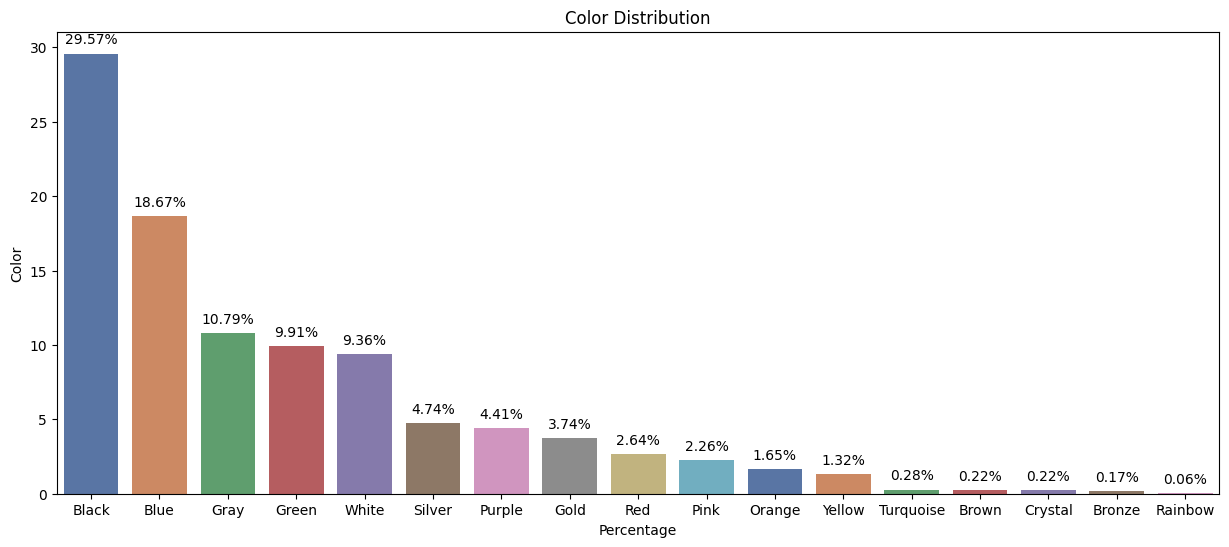

In [256]:
# Create the vertical bar plot of 'Color' values distribution
plt.figure(figsize=(15, 6))
barplot = sns.barplot(x=percentage.index, y=percentage, palette="deep")
# Annotate each bar with the percentage value
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')
# Set the labels and title
plt.xlabel('Percentage')
plt.ylabel("Color")
plt.title('Color Distribution')
plt.show()